1. Load data

In [0]:
import csv
import numpy as np

train_x = []
train_y = []

test_x = []
test_y = []

with open('data_train.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        train_x.append([i[0], i[1], i[2]])
        train_y.append([i[3]])
        # print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        ct += 1

with open('data_test.csv', newline='') as myfile:
    reader  = csv.reader(myfile, delimiter=',')
    ct = 1 
    for i in reader:
        test_x.append([i[0], i[1], i[2]])
        test_y.append([i[3]])
        # print('[', ct, ']', 'x =', i[0], ', y = ', i[1], ', z = ', i[2], ', h = ', i[3])
        ct += 1


- load then make train, test data set
- train_x $\in$ $R^3$ 

In [0]:
train_x = np.asarray(train_x).astype(np.float32)
train_y = np.asarray(train_y).astype(np.float32)

x = train_x[:, 0]
y = train_x[:, 1]
z = train_x[:, 2]
h = train_y[:, 0]

print(train_x.shape)
print(train_y.shape)
print(x.shape)
print(y.shape)
print(z.shape)
print(h.shape)

(300, 3)
(300, 1)
(300,)
(300,)
(300,)
(300,)


2. Linear regression

In [0]:
def hypothesis(theta_0, theta_1, theta_2, theta_3, x, y, z):
  a = theta_0 + theta_1 * x + theta_2 * y + theta_3 * z 
  # print("h : ", a.shape)

  return theta_0 + theta_1 * x + theta_2 * y + theta_3 * z 

- make linear model which has 3 params and 3 inputs.

In [0]:
def l2_loss (h_hat, h):
  m = len(h) # 300, 1
  ret = np.sum((h_hat - h)*(h_hat - h)) / (2*m)
  return ret

- make l2 loss for multi-variables

In [0]:
def gradient_descent(x, y, z, h, theta_0, theta_1, theta_2, theta_3, learning_rate=1e-7):
  """
  x : [300, 3] ndarray - the train x data
  y : [300, 1] ndarrat - the train y data
  """

  m = len(x)  
  
  gradient_theta_0 = np.sum(hypothesis(theta_0, theta_1, theta_2, theta_3, x, y, z) - h) / m
  gradient_theta_1 = np.sum((hypothesis(theta_0, theta_1, theta_2, theta_3, x, y, z) - h) * x) / m
  gradient_theta_2 = np.sum((hypothesis(theta_0, theta_1, theta_2, theta_3, x, y, z) - h) * y) / m
  gradient_theta_3 = np.sum((hypothesis(theta_0, theta_1, theta_2, theta_3, x, y, z) - h) * z) / m

  # print("gd : ", gradient_theta_0)

  new_theta_0 = theta_0 - learning_rate * gradient_theta_0
  new_theta_1 = theta_1 - learning_rate * gradient_theta_1
  new_theta_2 = theta_2 - learning_rate * gradient_theta_2
  new_theta_3 = theta_3 - learning_rate * gradient_theta_3

  return new_theta_0, new_theta_1, new_theta_2, new_theta_3

- make gradient descent algorithm for multi variable

In [0]:
# initialize thetas as -30 each.
theta_0 = 30
theta_1 = -220
theta_2 = -110
theta_3 = -230

theta_0_list = []
theta_1_list = []
theta_2_list = []
theta_3_list = []
loss_list = []

# until converge about 300 steps
converge_step = 300000
for i in range(converge_step):
  h_hat = hypothesis(theta_0, theta_1, theta_2, theta_3, x, y, z)
  # print(h_hat.shape)

  loss = l2_loss(h, h_hat)
  loss_list.append(loss)

  theta_0_list.append(theta_0)
  theta_1_list.append(theta_1)
  theta_2_list.append(theta_2)
  theta_3_list.append(theta_3)
  theta_0, theta_1, theta_2, theta_3 = gradient_descent(x, y, z, h, theta_0, theta_1, theta_2, theta_3)
  

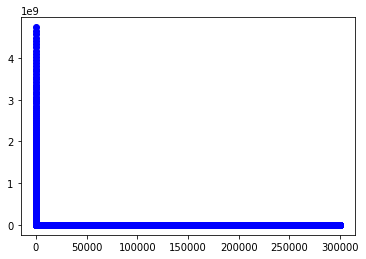

In [0]:
import matplotlib.pyplot as plt
x_ = np.arange(converge_step)
plt.scatter(x_, loss_list, c='b')

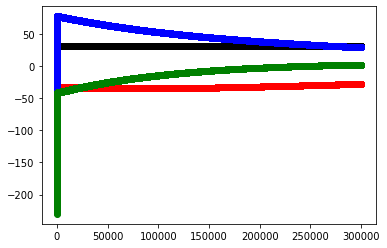

In [0]:
plt.scatter(x_, theta_0_list, c='k')
plt.scatter(x_, theta_1_list, c='r')
plt.scatter(x_, theta_2_list, c='b')
plt.scatter(x_, theta_3_list, c='g')